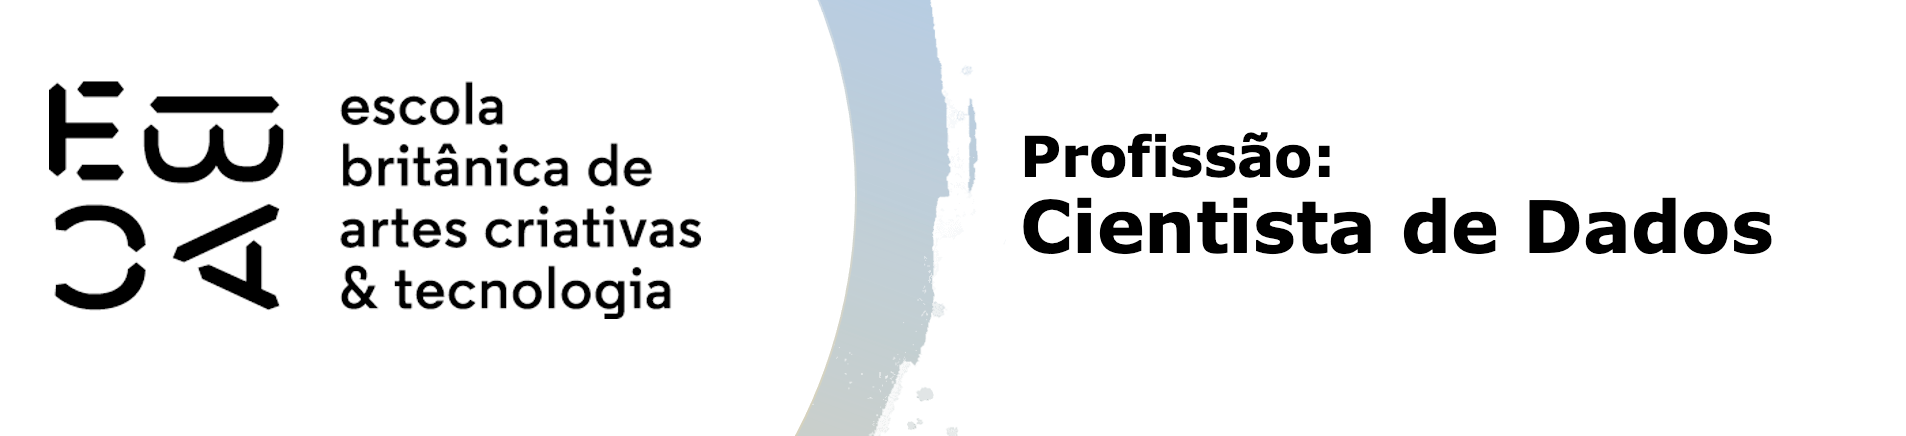

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [4]:
media_tempo_emprego = df.tempo_emprego.mean()
df['tempo_emprego'] = df['tempo_emprego'].fillna(media_tempo_emprego)
df['tempo_emprego'].isna().sum()

np.int64(0)

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [5]:
# Converter o índice para datetime
df.index = pd.to_datetime(df.index)

# ordenar o dataframe por data
df = df.sort_index()

#  Separar os três últimos meses para a base holdout
ultima_data = df.index.max()
holdout = df.loc[ultima_data - pd.DateOffset(months=3):]

# Separar o restante para a base de treino
train = df.loc[:ultima_data - pd.DateOffset(months=3) - pd.DateOffset(days=1)]

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$ na base de treino

In [6]:
# Converter variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, drop_first=True)

# Fazer o logaritmo da coluna 'renda'
df['log_renda'] = np.log(df['renda'])

# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=['renda', 'log_renda'])
y = df['log_renda']

# Converter X e y para tipos numéricos explícitos
X = X.astype(float)
y = y.astype(float)

# Adicionar uma constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Avaliar o modelo usando o R^2 ajustado na base de treino
r2_ajustado = model.rsquared_adj
print("\nR^2 ajustado na base de treino:", r2_ajustado)

# Mostrar o resumo do modelo
print(model.summary())


R^2 ajustado na base de treino: 0.393316075502422
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.945e+04
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:15:44   Log-Likelihood:            -1.0644e+06
No. Observations:              750000   AIC:                         2.129e+06
Df Residuals:                  749974   BIC:                         2.129e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Avaliação do modelo

O 𝑅² ajustado na base de treino foi de aproximadamente 0.3933, o que indica que cerca de 39.33% da variabilidade do logaritmo da renda pode ser explicada pelos preditores incluídos no modelo.

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [7]:
# Categorizar a variável 'tempo_emprego' em 20 quantis
qcut = pd.qcut(df['tempo_emprego'], 20, duplicates='drop')

# Adicionar a categorização como uma nova coluna no dataframe
df['tempo_emprego_qcut'] = qcut

# Exibir as primeiras 5 linhas do dataframe
print(df.head())

            index  qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia  \
data_ref                                                                     
2015-01-01   5762           0     47      16.717808                    2.0   
2015-01-01   1279           0     30       9.600000                    2.0   
2015-01-01  14111           0     28       8.208219                    2.0   
2015-01-01   8189           2     44       1.301370                    4.0   
2015-01-01   1830           2     33       1.254795                    4.0   

               renda  sexo_M  posse_de_veiculo_S  posse_de_imovel_S  \
data_ref                                                              
2015-01-01  11138.14    True                True              False   
2015-01-01   2424.81    True                True              False   
2015-01-01  13749.66    True                True              False   
2015-01-01   2361.84    True               False               True   
2015-01-01    790.78   Fals

C:\Users\marce\AppData\Local\Temp\ipykernel_10492\1830264539.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('tempo_emprego_qcut')[['log_renda', 'tempo_emprego']].mean()


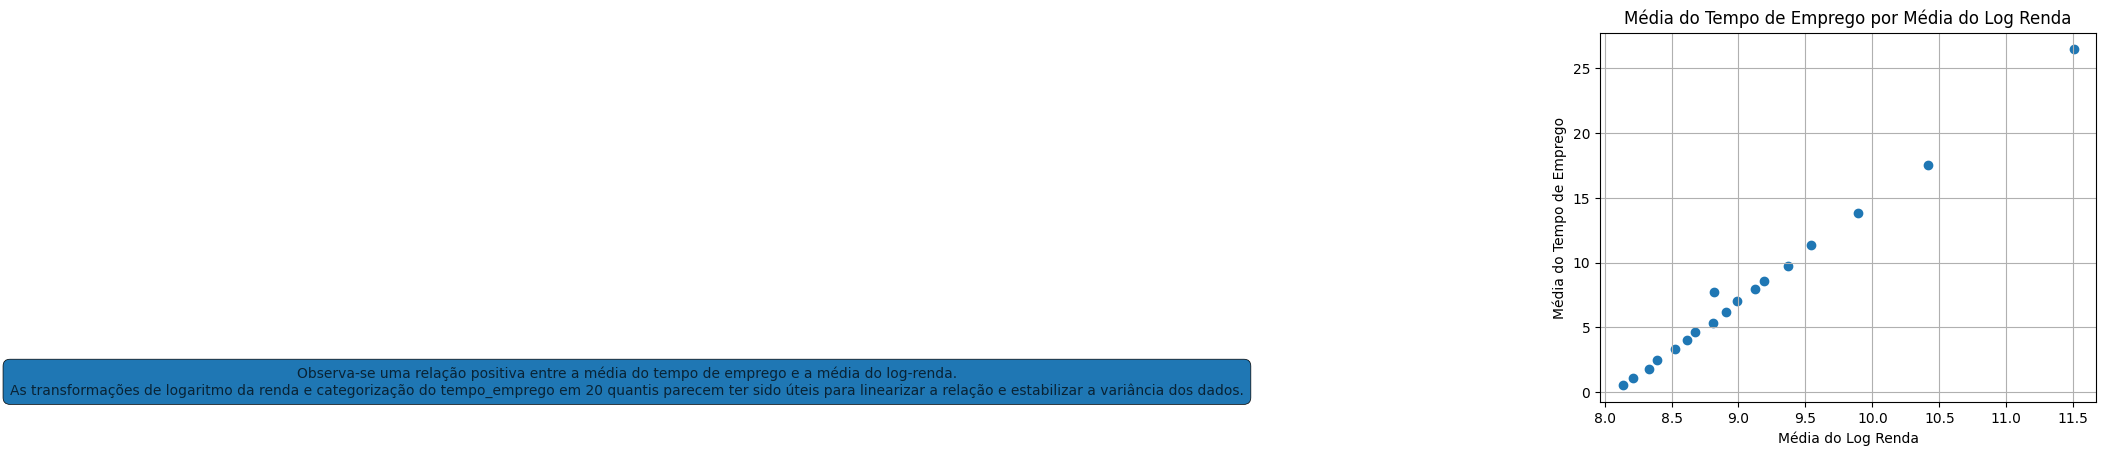

In [8]:
# Agrupar por 'tempo_emprego_qcut' e calcular a média do log-renda e do tempo_emprego
df_grouped = df.groupby('tempo_emprego_qcut')[['log_renda', 'tempo_emprego']].mean()

# Converter as médias em arrays NumPy
log_renda_mean = df_grouped['log_renda'].to_numpy()
tempo_emprego_mean = df_grouped['tempo_emprego'].to_numpy()

# Criar a figura e o subplot
fig, ax = plt.subplots()

# Plotar o scatter plot
ax.scatter(log_renda_mean, tempo_emprego_mean)

# Adicionar título, labels e grid
ax.set_title('Média do Tempo de Emprego por Média do Log Renda')
ax.set_xlabel('Média do Log Renda')
ax.set_ylabel('Média do Tempo de Emprego')
ax.grid(True)

# Adicionar célula de texto com comentário
text_props = dict(alpha=0.7)
ax.text(0.7, 0.8, 'Observa-se uma relação positiva entre a média do tempo de emprego e a média do log-renda.\nAs transformações de logaritmo da renda e categorização do tempo_emprego em 20 quantis parecem ter sido úteis para linearizar a relação e estabilizar a variância dos dados.', ha='center', va='center', bbox=dict(boxstyle='round', ec='k', lw=0.5, pad=0.5), **text_props)

# Exibir o gráfico
plt.show();

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [9]:
# Regressão Segmentada

# Separar as variáveis independentes (X) e dependentes (y)
X = df[['tempo_emprego']]

y = df['log_renda']

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

r2_ajustado = model.rsquared_adj
print("\nR^2 ajustado:", r2_ajustado)

# Mostrar o resumo dos resultados
print(model.summary())


R^2 ajustado: 0.3761319374268859
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 4.522e+05
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:15:45   Log-Likelihood:            -1.0749e+06
No. Observations:              750000   AIC:                         2.150e+06
Df Residuals:                  749998   BIC:                         2.150e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const       

In [10]:
# LOWESS
lowess_fit = lowess(y, X['tempo_emprego'], frac=0.3)
lowess_pred = np.interp(X['tempo_emprego'], lowess_fit[:, 0], lowess_fit[:, 1])
X['tempo_emprego_lowess'] = lowess_pred

# Adicionar uma constante para o intercepto
X_lowess = sm.add_constant(X)

model_lowess = OLS(y, X_lowess).fit()

# Avaliar o modelo usando o R^2 ajustado na base de treino
r2_ajustado_lowess = model_lowess.rsquared_adj
print("R^2 ajustado na base de treino (LOWESS):", r2_ajustado_lowess)


# Ajustar o modelo de regressão linear original
X_original = sm.add_constant(X.drop(columns=['tempo_emprego_lowess']))
model_original = OLS(y, X_original).fit()

# Avaliar o modelo usando o R^2 ajustado na base de treino
r2_ajustado_original = model_original.rsquared_adj
print("R^2 ajustado na base de treino (Original):", r2_ajustado_original)

# Mostrar os resumos dos modelos
print("\nResumo do modelo original:")
print(model_original.summary())

print("\nResumo do modelo com LOWESS:")
print(model_lowess.summary())

R^2 ajustado na base de treino (LOWESS): 0.38248621753247036
R^2 ajustado na base de treino (Original): 0.3761319374268859

Resumo do modelo original:
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 4.522e+05
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:18:05   Log-Likelihood:            -1.0749e+06
No. Observations:              750000   AIC:                         2.150e+06
Df Residuals:                  749998   BIC:                         2.150e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|  

* R^2 ajustado na base de treino (LOWESS): 0.38248621753247036
* R^2 ajustado na base de treino: 0.393316075502422
* R^2 ajustado na base de treino (Segmentado): 0.376131937426885

Não houve modificação considerável

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [28]:
# Dividir os dados em conjuntos de treino e teste
X = df[['tempo_emprego']]
y = df['log_renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Adicionar uma constante para o intercepto
X_train_original = sm.add_constant(X_train)
X_test_original = sm.add_constant(X_test)

# Ajustar o modelo de regressão linear original na base de treino
model_original = OLS(y_train, X_train_original).fit()

# Prever os valores usando o modelo ajustado na base de treino
y_pred_original = model_original.predict(X_test_original)

# Calcular o R^2 ajustado na base de teste
r2_ajustado_original_teste = 1 - (1 - model_original.rsquared) * ((len(y_test) - 1) / (len(y_test) - X_test_original.shape[1] - 1))
print("R^2 ajustado na base de teste (Original):", r2_ajustado_original_teste)

R^2 ajustado na base de teste (Original): 0.3763509587253089


In [30]:
# Ajustar o modelo com LOWESS na base de treino
lowess_fit = lowess(y_train, X_train['tempo_emprego'], frac=0.3)
lowess_pred = np.interp(X_train['tempo_emprego'], lowess_fit[:, 0], lowess_fit[:, 1])
X_train['tempo_emprego_lowess'] = lowess_pred

# Adicionar uma constante para o intercepto
X_train_lowess = sm.add_constant(X_train[['tempo_emprego_lowess']])

model_lowess = OLS(y_train, X_train_lowess).fit()

# Aplicar o ajuste LOWESS na base de teste
lowess_pred_test = np.interp(X_test['tempo_emprego'], lowess_fit[:, 0], lowess_fit[:, 1])
X_test['tempo_emprego_lowess'] = lowess_pred_test

# Adicionar uma constante para o intercepto
X_test_lowess = sm.add_constant(X_test[['tempo_emprego_lowess']])

# Prever os valores usando o modelo ajustado na base de treino
y_pred_lowess = model_lowess.predict(X_test_lowess)

# Calcular o R^2 ajustado na base de teste
r2_ajustado_lowess_teste = 1 - (1 - model_lowess.rsquared) * ((len(y_test) - 1) / (len(y_test) - X_test_lowess.shape[1] - 1))
print("R^2 ajustado na base de teste (LOWESS):", r2_ajustado_lowess_teste)


R^2 ajustado na base de teste (LOWESS): 0.38233673620861464


In [31]:
# Ajustar o modelo de regressão segmentada na base de treino
model_segmentada = sm.OLS(y_train, X_train).fit()

# Prever os valores usando o modelo ajustado na base de treino
y_pred_segmentada = model_segmentada.predict(X_test)

# Calcular o R^2 ajustado na base de teste
r2_ajustado_segmentada_teste = 1 - (1 - model_segmentada.rsquared) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("R^2 ajustado na base de teste (Segmentada):", r2_ajustado_segmentada_teste)

R^2 ajustado na base de teste (Segmentada): 0.9877920238676364


In [32]:
print("R² ajustado na base de teste (LOWESS):", r2_ajustado_lowess_teste)
print("R² ajustado na base de teste (Original):", r2_ajustado_original_teste)
print("R² ajustado na base de teste (Segmentada):", r2_ajustado_seg_teste)

R² ajustado na base de teste (LOWESS): 0.38233673620861464
R² ajustado na base de teste (Original): 0.3763509587253089
R² ajustado na base de teste (Segmentada): 0.37612445085596713
